In [1]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import neural_network
import matplotlib.pyplot as plt

In [2]:
train_percent = 0.80

companies = ['BPCL.BO','HINDPETRO.NS','ONGC.NS']

oilDataset = pd.read_csv('crud_oil.csv')
oilDataset.columns = ['date', 'oil_price']
oilDataset['date'] = pd.to_datetime(oilDataset['date'])

In [3]:
#oilDataset.head(5)

In [4]:
removed_features = ['Open', 'High', 'Low', 'Volume', 'Close']
print("Pearson Coefficients :-")

Pearson Coefficients :-


In [5]:
for company in companies:
    #Wrangling / Filtering of stock price data    
    stockDataset = pd.read_csv(company + '.csv')
    stockDataset.drop(removed_features, axis = 1, inplace=True)
    stockDataset.columns = ['date', 'adj_close']
    stockDataset['date'] = pd.to_datetime(stockDataset['date'])
    
    #merge oil and stock datasets using date as foreign key
    dataset = stockDataset.merge(oilDataset, on='date', how='right')
    dataset['oil_price'] = pd.to_numeric(dataset['oil_price'], errors='coerce')
    dataset['adj_close'] = pd.to_numeric(dataset['adj_close'], errors='coerce')
    dataset = dataset.dropna(0)
    
    #drop date as it is no longer needed
    datasetWithoutDate = dataset.drop('date', axis=1)
    datasetWithoutDate = datasetWithoutDate[datasetWithoutDate.columns].astype(float)    
    
    #Co-relation coefficient
    pearson, _ = pearsonr(dataset['oil_price'], dataset['adj_close'])
    
    print(company + " \t: " + str(pearson))

BPCL.BO 	: 0.2729172280681904
HINDPETRO.NS 	: 0.32929660227673524
ONGC.NS 	: 0.39960560594267963


In [6]:
#stockDataset.head()

In [7]:
#Split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(datasetWithoutDate['oil_price'],
                                                    datasetWithoutDate['adj_close'], 
                                                                      train_size=train_percent,
                                                                      test_size=1-train_percent)

In [8]:
regressor = RandomForestRegressor()

regressor.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))

y_pred = regressor.predict(pd.DataFrame(x_test))

C:\Users\SAHIL\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
x_test.shape

(170,)

In [18]:
y_test.shape

(170,)

In [19]:
x_train.shape

(677,)

In [20]:
y_train.shape

(677,)

Text(0, 0.5, 'Adjusted Closing Price')

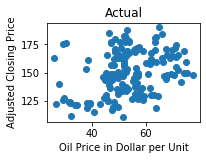

In [9]:
plt.figure()

plt.subplot(221)
plt.scatter(x=x_test, y=y_test)
plt.title('Actual')

plt.xlabel('Oil Price in Dollar per Unit')
plt.ylabel('Adjusted Closing Price')

Text(0, 0.5, 'Adjusted Closing Price')

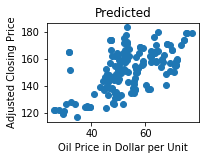

In [10]:
plt.subplot(222)
plt.scatter(x=x_test, y=y_pred)
plt.title('Predicted')

plt.xlabel('Oil Price in Dollar per Unit')
plt.ylabel('Adjusted Closing Price')

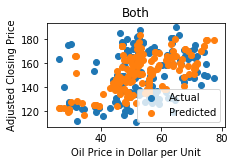

In [11]:
plt.subplot(223)
plt.scatter(x=x_test, y=y_test)
plt.scatter(x=x_test, y=y_pred)
plt.legend(['Actual', 'Predicted'])
plt.title('Both')

plt.xlabel('Oil Price in Dollar per Unit')
plt.ylabel('Adjusted Closing Price')

plt.tight_layout()

In [14]:
regressor.score(pd.DataFrame(x_test), pd.DataFrame(y_test))

-0.1393343312587716